<a href="https://colab.research.google.com/github/hyulianton/jejaringsosial/blob/master/js_%F0%9F%90%AC_Analisis_Centrality_pada_Dataset_Jaringan_Sosial_Lumba_lumba.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🐬 Analisis Centrality pada Dataset Publik: Jaringan Sosial Lumba-lumba

### Cell 1: Persiapan, Pemuatan Dataset, dan Pemeriksaan Jaringan

Kita menggunakan dataset standar dari NetworkX yaitu **Dolphin Social Network**. Jaringan ini memetakan interaksi sosial antar lumba-lumba hidung botol di Doubtful Sound, Selandia Baru. Dataset ini terdiri dari 62 node (individu lumba-lumba).

In [4]:
# Cell 1: Persiapan, Download File, Pemuatan Graph, dan Pemeriksaan Jaringan (REVISI FINAL)

# Import library yang dibutuhkan
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests # Digunakan untuk download file
import os       # Digunakan untuk manajemen file

# URL Sumber Dataset Alternatif dari GitHub
DOLPHIN_URL = "https://raw.githubusercontent.com/eflegara/Network-Science-Lectures/refs/heads/master/datasets/dolphins.gml"
LOCAL_FILENAME = "dolphins.gml"

# --- 1. Download Dataset Publik ---
print(f"Mencoba mengunduh file {LOCAL_FILENAME} dari: {DOLPHIN_URL}")
try:
    # Mengirim permintaan HTTP GET untuk mengunduh file
    response = requests.get(DOLPHIN_URL)
    response.raise_for_status() # Raise exception untuk HTTP error (4xx or 5xx)

    # Menyimpan konten yang diunduh ke file lokal
    with open(LOCAL_FILENAME, 'wb') as f:
        f.write(response.content)
    print(f"[SUCCESS] File {LOCAL_FILENAME} berhasil diunduh secara lokal.")

except requests.exceptions.RequestException as e:
    # Tangani kegagalan koneksi atau error HTTP
    print(f"[ERROR] Gagal mengunduh dataset: {e}")
    print("Pastikan URL sudah benar dan koneksi internet Anda stabil.")
    raise SystemExit("Pemuatan Gagal. Hentikan eksekusi untuk mencegah NameError.")

# --- 2. Pemuatan Graph dari File Lokal ---
try:
    # NetworkX memuat graph dari file GML lokal yang baru diunduh
    G = nx.read_gml(LOCAL_FILENAME)
    print("[SUCCESS] Graph G berhasil dimuat dari file GML lokal.")

except Exception as e:
    G = nx.Graph() # Pastikan G terdefinisi
    print(f"[ERROR] Gagal memuat graph dari file GML: {e}")
    raise SystemExit("Pemuatan Gagal. Hentikan eksekusi untuk mencegah NameError.")

finally:
    # --- 3. Membersihkan File Sementara (Opsional, tapi disarankan) ---
    if os.path.exists(LOCAL_FILENAME):
        os.remove(LOCAL_FILENAME)
        # print(f"[INFO] File sementara {LOCAL_FILENAME} telah dihapus.")

# --- 4. Pemeriksaan Jaringan ---
N_NODES = G.number_of_nodes()
N_EDGES = G.number_of_edges()

print(f"\nProperti Jaringan:")
print(f"- Jumlah Node (Individu Lumba-lumba): {N_NODES}")
print(f"- Jumlah Edge (Interaksi Sosial): {N_EDGES}")

# Menampilkan 5 node pertama (lumba-lumba)
print("\n5 Node (Lumba-lumba) Pertama:")
print(list(G.nodes())[:5])

Mencoba mengunduh file dolphins.gml dari: https://raw.githubusercontent.com/eflegara/Network-Science-Lectures/refs/heads/master/datasets/dolphins.gml
[SUCCESS] File dolphins.gml berhasil diunduh secara lokal.
[SUCCESS] Graph G berhasil dimuat dari file GML lokal.

Properti Jaringan:
- Jumlah Node (Individu Lumba-lumba): 62
- Jumlah Edge (Interaksi Sosial): 159

5 Node (Lumba-lumba) Pertama:
['Beak', 'Beescratch', 'Bumper', 'CCL', 'Cross']


### Cell 2: Visualisasi Awal Jaringan

Visualisasi awal menggunakan *spring layout* untuk memperlihatkan struktur alami (cluster) dalam jaringan.

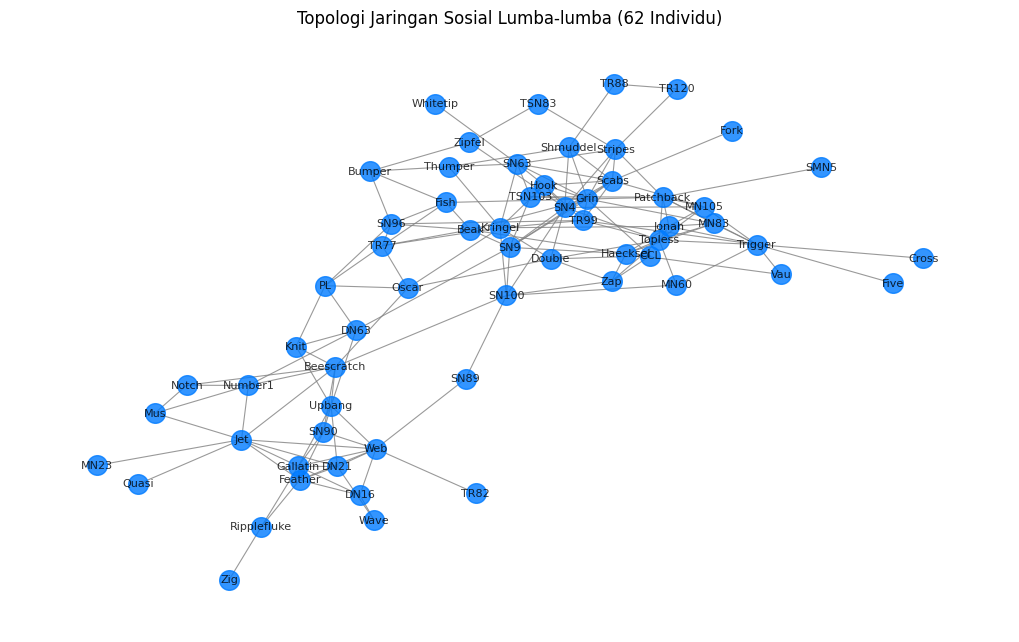

Visualisasi menunjukkan bagaimana interaksi sosial antar lumba-lumba terdistribusi.


In [5]:
# Cell 2: Visualisasi Awal Jaringan

# Tentukan layout visualisasi (spring_layout cocok untuk jejaring sosial)
# Seed digunakan agar posisi node selalu sama (reproducible)
pos = nx.spring_layout(G, seed=7)

plt.figure(figsize=(10, 6))

# Menggambar node dan edge menggunakan nx.draw() (kompatibel dengan NetworkX 3.5+)
nx.draw(G, pos,
        node_size=200,
        node_color='#007BFF', # Warna biru khas lautan
        with_labels=True,      # Tampilkan label/nama lumba-lumba
        font_size=8,
        width=0.8,             # Ketebalan edge
        edge_color='gray',
        alpha=0.8)             # Transparansi

plt.title(f"Topologi Jaringan Sosial Lumba-lumba ({N_NODES} Individu)")
plt.axis('off')
plt.show()

print("Visualisasi menunjukkan bagaimana interaksi sosial antar lumba-lumba terdistribusi.")

### Cell 3: Perhitungan dan Tabulasi Centrality Measures

Kita hitung empat metrik Centrality utama. Kita fokus pada 5 lumba-lumba teratas untuk setiap metrik.

In [6]:
# Cell 3: Perhitungan dan Tabulasi Centrality Measures

# 1. Hitung semua metrik centrality
degree_c = nx.degree_centrality(G)
betweenness_c = nx.betweenness_centrality(G)
closeness_c = nx.closeness_centrality(G)
eigenvector_c = nx.eigenvector_centrality(G, max_iter=1000)

# 2. Konversi hasil ke DataFrame
data = {
    'Node': list(G.nodes()),
    'Degree': [degree_c[node] for node in G.nodes()],
    'Betweenness': [betweenness_c[node] for node in G.nodes()],
    'Closeness': [closeness_c[node] for node in G.nodes()],
    'Eigenvector': [eigenvector_c[node] for node in G.nodes()]
}

df_centrality = pd.DataFrame(data).set_index('Node')

print("Perhitungan Centrality Selesai. Berikut adalah 5 Aktor Teratas untuk setiap metrik:\n")

# 3. Tampilkan 5 Teratas untuk setiap metrik
print("--- 1. Aktor Paling Populer (Degree) ---")
print(df_centrality.sort_values(by='Degree', ascending=False).head())

print("\n--- 2. Aktor Paling Kontrol (Betweenness) ---")
print(df_centrality.sort_values(by='Betweenness', ascending=False).head())

print("\n--- 3. Aktor Paling Efisien (Closeness) ---")
print(df_centrality.sort_values(by='Closeness', ascending=False).head())

print("\n--- 4. Aktor Paling Berpengaruh (Eigenvector) ---")
print(df_centrality.sort_values(by='Eigenvector', ascending=False).head())

Perhitungan Centrality Selesai. Berikut adalah 5 Aktor Teratas untuk setiap metrik:

--- 1. Aktor Paling Populer (Degree) ---
           Degree  Betweenness  Closeness  Eigenvector
Node                                                  
Grin     0.196721     0.061972   0.376543     0.315781
SN4      0.180328     0.138570   0.398693     0.300561
Topless  0.180328     0.040670   0.346591     0.285003
Scabs    0.163934     0.057166   0.365269     0.281097
Trigger  0.163934     0.084677   0.329730     0.210680

--- 2. Aktor Paling Kontrol (Betweenness) ---
              Degree  Betweenness  Closeness  Eigenvector
Node                                                     
SN100       0.114754     0.248237   0.417808     0.132766
Beescratch  0.131148     0.213324   0.371951     0.042091
SN9         0.131148     0.143150   0.403974     0.207873
SN4         0.180328     0.138570   0.398693     0.300561
DN63        0.081967     0.118239   0.365269     0.042908

--- 3. Aktor Paling Efisien (Closen

### Cell 4: Analisis dan Visualisasi Strategis (Betweenness)

Dalam konteks jejaring sosial, **Betweenness Centrality** sering mengidentifikasi **juru bicara** atau **jembatan komunikasi** (aktor yang menghubungkan dua kelompok). Kita akan memvisualisasikan jaringan dengan ukuran node berdasarkan nilai Betweenness.

> **Penting**: Kita mengimplementasikan solusi `ScalarMappable` agar *colorbar* dapat ditampilkan dengan benar.

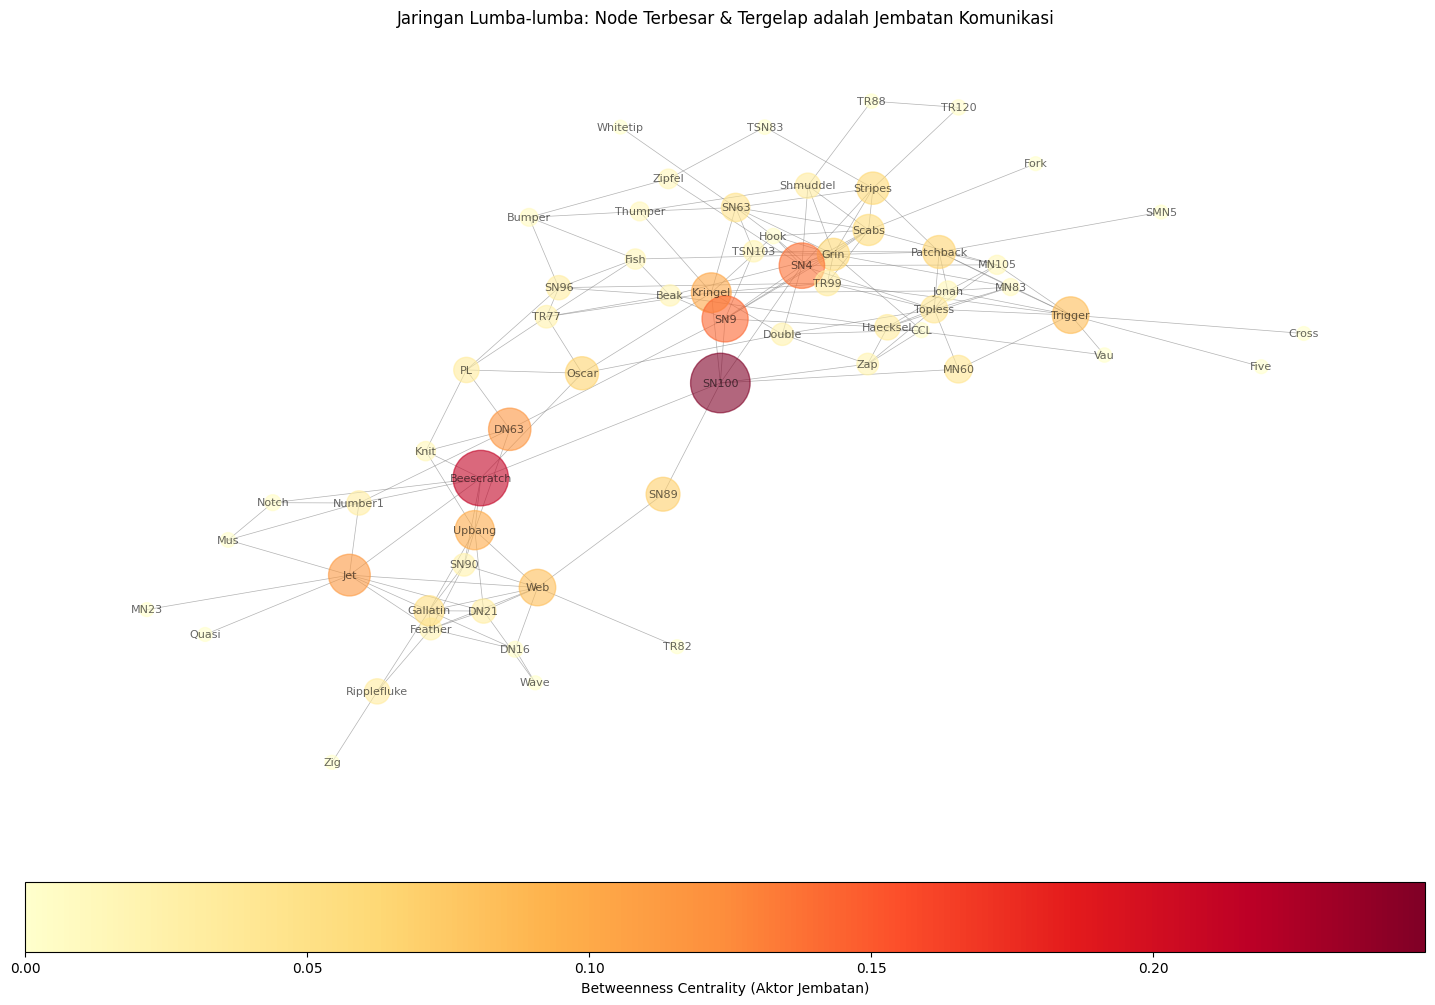


Kesimpulan: Lumba-lumba **SN100** adalah Jembatan utama dalam jaringan ini.
Lumba-lumba ini adalah aktor paling berpengaruh untuk memastikan informasi mengalir antar semua kelompok.


In [7]:
# Cell 4: Visualisasi Berdasarkan Betweenness Centrality (Fokus pada Jembatan)

# Ambil data centrality
node_betweenness_values = list(betweenness_c.values())
node_sizes = [v * 7000 + 100 for v in node_betweenness_values] # Scaling ukuran agar terlihat
pos = nx.spring_layout(G, seed=7) # Gunakan posisi yang sama

plt.figure(figsize=(14, 10))

# 1. Menggambar Jaringan menggunakan nx.draw()
cmap = plt.cm.YlOrRd # Peta warna: Kuning ke Merah (Merah = Betweenness Tinggi)
nx.draw(G, pos,
        node_size=node_sizes,
        node_color=node_betweenness_values,
        cmap=cmap,
        with_labels=True,
        font_size=8,
        width=0.5,
        edge_color='gray',
        alpha=0.6)

# --- BAGIAN KRITIS UNTUK COLORBAR (Solusi Matplotlib) ---
# 2. Buat Objek Mappable Eksplisit
# Ini memecahkan RuntimeError karena nx.draw() tidak mengembalikan objek mappable
sm = plt.cm.ScalarMappable(cmap=cmap,
                           norm=plt.Normalize(vmin=min(node_betweenness_values),
                                              vmax=max(node_betweenness_values)))
sm.set_array([]) # Tidak perlu data, hanya untuk inisialisasi

# 3. Tambahkan Color Bar
plt.colorbar(sm,
             label='Betweenness Centrality (Aktor Jembatan)',
             ax=plt.gca(),
             orientation='horizontal',
             pad=0.05)


plt.title("Jaringan Lumba-lumba: Node Terbesar & Tergelap adalah Jembatan Komunikasi")
plt.axis('off')
plt.show()

# Kesimpulan cepat
node_betweenness, val_betweenness = df_centrality['Betweenness'].idxmax(), df_centrality['Betweenness'].max()
print(f"\nKesimpulan: Lumba-lumba **{node_betweenness}** adalah Jembatan utama dalam jaringan ini.")
print(f"Lumba-lumba ini adalah aktor paling berpengaruh untuk memastikan informasi mengalir antar semua kelompok.")